In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm,skew
from sklearn.preprocessing import Imputer

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [66]:
df = pd.read_csv('./data/train.csv',index_col=0)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Handling Outliers

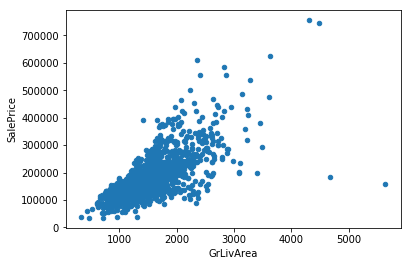

In [5]:
data=pd.concat([df['SalePrice'],df['GrLivArea']],axis=1)
data.plot.scatter(x='GrLivArea',y = 'SalePrice')

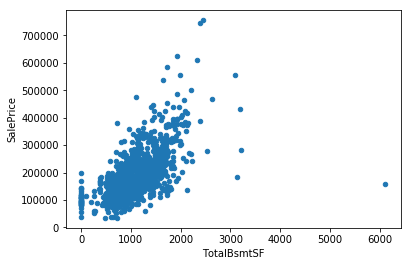

In [6]:
data=pd.concat([df['SalePrice'],df['TotalBsmtSF']],axis=1)
data.plot.scatter(x='TotalBsmtSF',y = 'SalePrice')

3.10.0


KeyError: "['Sale Price'] not in index"

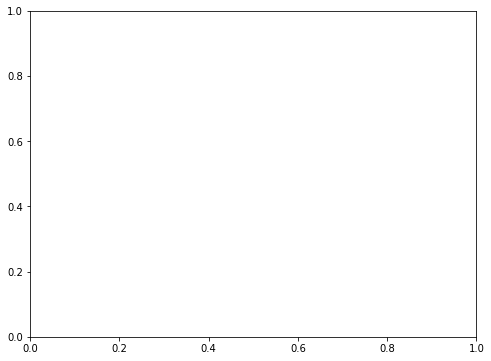

In [11]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__) # requires version >= 1.9.0
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()
df1=pd.concat([df['SalePrice'],df['OverallQual']],axis=1)

df1.iplot(kind='box')
f,ax = plt.subplots(figsize=(8,6))
fig=sns.boxplot(x='OverallQual',y="SalePrice",data=df[['Sale Price','OverallQual']])
fig.axis(ymin=0,ymax=800000)


Text(0, 0.5, 'SalePrice')

Text(0.5, 0, 'GrLivArea')

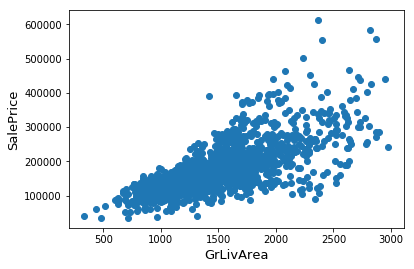

In [68]:
fig,ax=plt.subplots()


df=df.drop(df[(df['GrLivArea']>3000) & (df['GrLivArea']<6000)].index)

ax.scatter(df['GrLivArea'],df['SalePrice'])
plt.ylabel('SalePrice',fontsize=13)
plt.xlabel('GrLivArea',fontsize=13)
plt.show()

df.iplot(kind='scatter',x='GrLivArea',y='SalePrice',mode='markers',size=10)

           

In [41]:
df
nulls=df.isnull().sum(axis=1).sort_values(ascending=False)
total = len(df.columns)
df['PercNulls'] = (df.isnull().sum(axis=1).sort_values(ascending=False) /total)*100
#df.head()


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900


In [42]:
df.tail()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,PercNulls
Id,,,,,,,,,,,,,,,,,,,,,
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,8,2007,WD,Normal,175000,5.00
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000,3.75
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500,2.50
1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,4,2010,WD,Normal,142125,6.25
1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,6,2008,WD,Normal,147500,6.25


In [47]:
len(df.columns)

80

In [48]:
total=df.isnull().sum(axis=0).sort_values(ascending=False)
percent=(100*total)/len(df)
missing_data_columns = pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing_data_columns.head(20)

,Total,Percent
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageType,81,5.547945
GarageCond,81,5.547945
GarageFinish,81,5.547945
GarageQual,81,5.547945


In [70]:
df1=df.copy()
df1.drop(['PoolQC','MiscFeature','Alley','Fence'],axis=1,inplace=True)

In [55]:
df1.info()
df1.isnull().sum(axis=0).sort_values(ascending=False)



<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 76 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1452 no

FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrType         8
MasVnrArea         8
Electrical         1
YearBuilt          0
Exterior2nd        0
Exterior1st        0
ExterQual          0
ExterCond          0
Foundation         0
RoofMatl           0
RoofStyle          0
YearRemodAdd       0
SalePrice          0
OverallCond        0
OverallQual        0
HouseStyle         0
BldgType           0
Condition2         0
                ... 
GarageArea         0
PavedDrive         0
WoodDeckSF         0
OpenPorchSF        0
3SsnPorch          0
BsmtUnfSF          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SaleType           0
Functional         0
TotRmsAbvGrd       0
KitchenQual        0
KitchenAbvGr       0
BedroomAbvGr 

In [73]:
df2=df.copy()
df2['PoolQC']=df2['PoolQC'].fillna('None')
df2['MiscFeature']=df2['MiscFeature'].fillna('None')
df2

for col in('GarageYrBlt','GarageArea','GarageCars') :
    df2[col] = df2[col].fillna(0)
print(df[['GarageYrBlt','GarageArea','GarageCars']])   



,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,None,NaN,None,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,None,NaN,None,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,None,NaN,None,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,None,NaN,None,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,None,NaN,None,0,12,2008,WD,Normal,250000
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,None,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,None,NaN,None,0,8,2007,WD,Normal,307000
8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,None,NaN,Shed,350,11,2009,WD,Normal,200000
9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,None,NaN,None,0,4,2008,WD,Abnorml,129900


      GarageYrBlt  GarageArea  GarageCars
Id                                       
1          2003.0         548           2
2          1976.0         460           2
3          2001.0         608           2
4          1998.0         642           3
5          2000.0         836           3
6          1993.0         480           2
7          2004.0         636           2
8          1973.0         484           2
9          1931.0         468           2
10         1939.0         205           1
11         1965.0         384           1
12         2005.0         736           3
13         1962.0         352           1
14         2006.0         840           3
15         1960.0         352           1
16         1991.0         576           2
17         1970.0         480           2
18         1967.0         516           2
19         2004.0         576           2
20         1958.0         294           1
21         2005.0         853           3
22         1930.0         280     

In [63]:
imp_mean = Imputer(missing_values = 'NaN',strategy='mean')
imp_mean.fit(df2[['LotFrontage']])
df2['LotFrontage'] = imp_mean.transform(df[['LotFrontage']])
df2['LotFrontage']

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning:

Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.



Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)

Id
1        65.000000
2        80.000000
3        68.000000
4        60.000000
5        84.000000
6        85.000000
7        75.000000
8        70.049958
9        51.000000
10       50.000000
11       70.000000
12       85.000000
13       70.049958
14       91.000000
15       70.049958
16       51.000000
17       70.049958
18       72.000000
19       66.000000
20       70.000000
21      101.000000
22       57.000000
23       75.000000
24       44.000000
25       70.049958
26      110.000000
27       60.000000
28       98.000000
29       47.000000
30       60.000000
           ...    
1431     60.000000
1432     70.049958
1433     60.000000
1434     93.000000
1435     80.000000
1436     80.000000
1437     60.000000
1438     96.000000
1439     90.000000
1440     80.000000
1441     79.000000
1442     70.049958
1443     85.000000
1444     70.049958
1445     63.000000
1446     70.000000
1447     70.049958
1448     80.000000
1449     70.000000
1450     21.000000
1451     60.000000
1452     

In [65]:
imp_mean = Imputer(missing_values = 'NaN',strategy='most_frequent')
imp_mean.fit(df2[['MSZoning']])
df2['MSZoning']
df2['MSZoning'] = imp_mean.transform(df[['MSZoning']])
df2['MSZoning']

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning:

Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.



ValueError: could not convert string to float: 'RL'

In [ ]:
import sklearn.linear_model LinearRegression
LR = LinearRegression()
X=df.iloc[:,:-1]
y = df.iloc[:,-1]




from sklearn.model_selection import train_test_split
X_train , X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=101)

LR.fit(X,y)
predictions = LR.predict(X_test)
plt.scatter(y_test,predictions)

In [74]:
df.shape
df1.shape
df2.shape


(1442, 80)

(1442, 76)

(1442, 80)

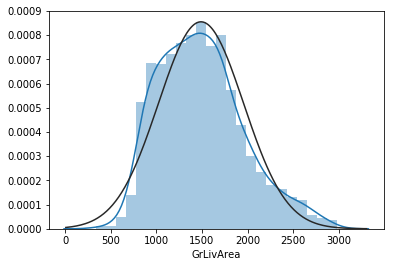

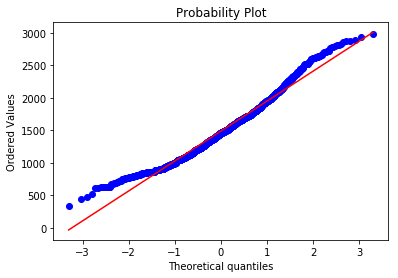

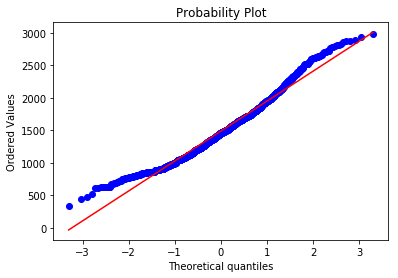

In [77]:
sns.distplot(df['GrLivArea'],fit=norm)
fig=plt.figure()
res=stats.probplot(df['GrLivArea'],plot=plt)
fig=plt.figure()
res=stats.probplot(df1['GrLivArea'],plot=plt)

In [78]:
skewed_grLiv=skew(df['GrLivArea'])
print(skewed_grLiv)

0.5639914400631191


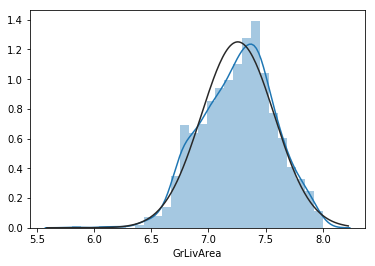

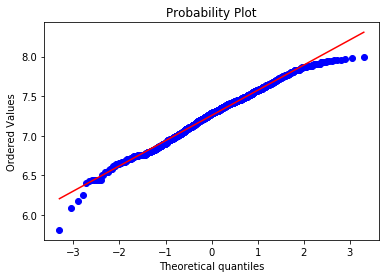

In [80]:
df_trans=df.copy()
df_trans['GrLivArea'] = np.log(df_trans['GrLivArea'])
sns.distplot(df_trans['GrLivArea'],fit=norm)
fig=plt.figure()
res=stats.probplot(df_trans['GrLivArea'],plot=plt)


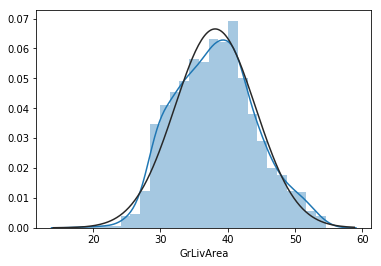

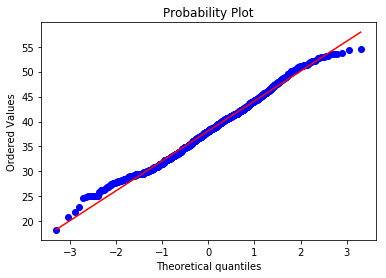

In [82]:
df_trans=df.copy()
df_trans['GrLivArea'] = np.sqrt(df_trans['GrLivArea'])
sns.distplot(df_trans['GrLivArea'],fit=norm)
fig=plt.figure()
res=stats.probplot(df_trans['GrLivArea'],plot=plt)


In [83]:
numeric_feature = [a for a in range(len(df.dtypes)) if df.dtypes[a] in ['int64','float64']]
numeric_data = df.iloc[:,numeric_feature]

cat_name=df.columns.difference(df.columns[numeric_feature])
cat_data = df.loc[:,cat_name]

numeric_data.head()
cat_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


,Alley,BldgType,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,CentralAir,Condition1,Condition2,...,MiscFeature,Neighborhood,PavedDrive,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,Street,Utilities
Id,,,,,,,,,,,,,,,,,,,,,
1,NaN,1Fam,TA,No,GLQ,Unf,Gd,Y,Norm,Norm,...,NaN,CollgCr,Y,NaN,CompShg,Gable,Normal,WD,Pave,AllPub
2,NaN,1Fam,TA,Gd,ALQ,Unf,Gd,Y,Feedr,Norm,...,NaN,Veenker,Y,NaN,CompShg,Gable,Normal,WD,Pave,AllPub
3,NaN,1Fam,TA,Mn,GLQ,Unf,Gd,Y,Norm,Norm,...,NaN,CollgCr,Y,NaN,CompShg,Gable,Normal,WD,Pave,AllPub
4,NaN,1Fam,Gd,No,ALQ,Unf,TA,Y,Norm,Norm,...,NaN,Crawfor,Y,NaN,CompShg,Gable,Abnorml,WD,Pave,AllPub
5,NaN,1Fam,TA,Av,GLQ,Unf,Gd,Y,Norm,Norm,...,NaN,NoRidge,Y,NaN,CompShg,Gable,Normal,WD,Pave,AllPub


In [87]:
from sklearn.preprocessing import Imputer
fill_Nan = Imputer(missing_values=np.nan,strategy='median',axis=1)
imputed_DF = pd.DataFrame(fill_Nan.fit_transform(numeric_data))
imputed_DF.columns=numeric_data.columns
imputed_DF.index=numeric_data.index
#imputed_DF.info()
imputed_DF.head()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning:

Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.



,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,...,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,208500.0
2,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,...,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,181500.0
3,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,...,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,223500.0
4,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,0.0,...,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,140000.0
5,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,0.0,...,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,250000.0


In [88]:
imputed_DF.isnull().values.any()

False

In [90]:
column_transform = numeric_data.columns
column_transform


Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [94]:
from sklearn.preprocessing import StandardScaler
stand_scale = StandardScaler()
imputed_DF=pd.DataFrame(stand_scale.fit_transform(imputed_DF))
imputed_DF.columns = numeric_data.columns
imputed_DF.index = numeric_data.index

imputed_DF.head()



,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,0.076255,0.213675,-0.194541,0.682599,-0.518955,1.054794,0.882718,0.560635,0.632594,-0.288541,...,-0.746410,0.228068,-0.364331,-0.117073,-0.270177,-0.052286,-0.088238,-1.604317,0.137899,0.409612
2,-0.867602,0.681207,-0.077150,-0.053057,2.198961,0.154234,-0.421313,-0.580792,1.267655,-0.288541,...,1.650317,-0.706060,-0.364331,-0.117073,-0.270177,-0.052286,-0.088238,-0.494228,-0.615323,0.043058
3,0.076255,0.307181,0.091280,0.682599,-0.518955,0.988086,0.834421,0.362633,0.118941,-0.288541,...,-0.746410,-0.062890,-0.364331,-0.117073,-0.270177,-0.052286,-0.088238,0.985890,0.137899,0.613253
4,0.312219,0.057831,-0.082254,0.682599,-0.518955,-1.880365,-0.711098,-0.580792,-0.511451,-0.288541,...,-0.746410,-0.170085,4.214305,-0.117073,-0.270177,-0.052286,-0.088238,-1.604317,-1.368546,-0.520350
5,0.076255,0.805882,0.398537,1.418255,-0.518955,0.954732,0.737826,1.457471,0.513520,-0.288541,...,0.797790,0.580281,-0.364331,-0.117073,-0.270177,-0.052286,-0.088238,2.095979,0.137899,0.973019


In [95]:
df['PoolScore'] = df['PoolArea'] * df['PoolQC']
#BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath'
df['TotalBath'] = df['BsmtFullBath'] + (0.5 * df['BsmtHalfBath']) + df['FullBath'] + (0.5 * df['HalfBath'])

In [99]:
type(df['SaleType'])
df.info()



pandas.core.series.Series

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1442 entries, 1 to 1460
Data columns (total 82 columns):
MSSubClass       1442 non-null int64
MSZoning         1442 non-null object
LotFrontage      1185 non-null float64
LotArea          1442 non-null int64
Street           1442 non-null object
Alley            90 non-null object
LotShape         1442 non-null object
LandContour      1442 non-null object
Utilities        1442 non-null object
LotConfig        1442 non-null object
LandSlope        1442 non-null object
Neighborhood     1442 non-null object
Condition1       1442 non-null object
Condition2       1442 non-null object
BldgType         1442 non-null object
HouseStyle       1442 non-null object
OverallQual      1442 non-null int64
OverallCond      1442 non-null int64
YearBuilt        1442 non-null int64
YearRemodAdd     1442 non-null int64
RoofStyle        1442 non-null object
RoofMatl         1442 non-null object
Exterior1st      1442 non-null object
Exterior2nd      1442 non-

In [104]:
from sklearn.preprocessing import LabelEncoder
def dummyEncode(df) :
    columnstoEncode = list(df.select_dtypes(include=['category','object']))
    le=LabelEncoder()
    for feature in columnstoEncode:
        try:
            df[feature]=le.fit_transform(df[feature])
        except :
            print('Error encoding '+feature)
    return df
                

In [105]:
dummyEncode(cat_data)

Error encoding Alley
Error encoding BsmtCond
Error encoding BsmtExposure
Error encoding BsmtFinType1
Error encoding BsmtFinType2
Error encoding BsmtQual
Error encoding Electrical
Error encoding Fence
Error encoding FireplaceQu
Error encoding GarageCond
Error encoding GarageFinish
Error encoding GarageQual
Error encoding GarageType
Error encoding MasVnrType
Error encoding MiscFeature
Error encoding PoolQC


,Alley,BldgType,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,CentralAir,Condition1,Condition2,...,MiscFeature,Neighborhood,PavedDrive,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,Street,Utilities
Id,,,,,,,,,,,,,,,,,,,,,
1,NaN,0,TA,No,GLQ,Unf,Gd,1,2,2,...,NaN,5,2,NaN,0,1,4,8,1,0
2,NaN,0,TA,Gd,ALQ,Unf,Gd,1,1,2,...,NaN,24,2,NaN,0,1,4,8,1,0
3,NaN,0,TA,Mn,GLQ,Unf,Gd,1,2,2,...,NaN,5,2,NaN,0,1,4,8,1,0
4,NaN,0,Gd,No,ALQ,Unf,TA,1,2,2,...,NaN,6,2,NaN,0,1,0,8,1,0
5,NaN,0,TA,Av,GLQ,Unf,Gd,1,2,2,...,NaN,15,2,NaN,0,1,4,8,1,0
6,NaN,0,TA,No,GLQ,Unf,Gd,1,2,2,...,Shed,11,2,NaN,0,1,4,8,1,0
7,NaN,0,TA,Av,GLQ,Unf,Ex,1,2,2,...,NaN,21,2,NaN,0,1,4,8,1,0
8,NaN,0,TA,Mn,ALQ,BLQ,Gd,1,4,2,...,Shed,14,2,NaN,0,1,4,8,1,0
9,NaN,0,TA,No,Unf,Unf,TA,1,0,2,...,NaN,17,2,NaN,0,1,0,8,1,0


In [107]:
pd.get_dummies(cat_data,drop_first=True)
cat_data.info()

,BldgType,CentralAir,Condition1,Condition2,ExterCond,ExterQual,Exterior1st,Exterior2nd,Foundation,Functional,...,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,PoolQC_Gd
Id,,,,,,,,,,,,,,,,,,,,,
1,0,1,2,2,4,2,12,13,2,6,...,0,0,0,1,0,0,0,0,0,0
2,0,1,1,2,4,3,8,8,1,6,...,0,0,0,0,1,0,0,0,0,0
3,0,1,2,2,4,2,12,13,2,6,...,0,0,0,1,0,0,0,0,0,0
4,0,1,2,2,4,3,13,15,0,6,...,0,0,1,0,1,0,0,0,0,0
5,0,1,2,2,4,2,12,13,2,6,...,0,0,0,1,0,0,0,0,0,0
6,0,1,2,2,4,3,12,13,5,6,...,0,0,0,0,1,0,0,1,0,0
7,0,1,2,2,4,2,12,13,2,6,...,0,0,0,0,0,1,0,0,0,0
8,0,1,4,2,4,3,6,6,1,6,...,0,0,0,0,0,1,0,1,0,0
9,0,1,0,2,4,3,3,15,0,2,...,0,0,1,0,1,0,0,0,0,0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1442 entries, 1 to 1460
Data columns (total 43 columns):
Alley            90 non-null object
BldgType         1442 non-null int32
BsmtCond         1405 non-null object
BsmtExposure     1404 non-null object
BsmtFinType1     1405 non-null object
BsmtFinType2     1404 non-null object
BsmtQual         1405 non-null object
CentralAir       1442 non-null int32
Condition1       1442 non-null int32
Condition2       1442 non-null int32
Electrical       1441 non-null object
ExterCond        1442 non-null int32
ExterQual        1442 non-null int32
Exterior1st      1442 non-null int32
Exterior2nd      1442 non-null int32
Fence            276 non-null object
FireplaceQu      753 non-null object
Foundation       1442 non-null int32
Functional       1442 non-null int32
GarageCond       1363 non-null object
GarageFinish     1363 non-null object
GarageQual       1363 non-null object
GarageType       1363 non-null object
Heating          1442 non-null in